# Academic Project
## Class: ML-II


    Develope a multiclass image classficiation model using Convolutional Neural Network and TensorFlow API on Python
    
    
   - The given dataset contain 5200 training images of 4 classes and 1267 testing images.
   - Extract files from multiclass_datasets.rar.
   - train_data_bi.npy is containing 5200 training photos with labels
   - test_data_bi.npy is containing 1267 testing photos with labels.

- Classes are chair & kitchen & knife & saucepan. Classes are equal(1300 glass - 1300 kitchen - 1300 knife- 1300 saucepan) on training data.

Download data from here. Warning 962 MB


# Architecture

AlexNet is used as architecture. 5 convolution layers and 3 Fully Connected Layers with 0.5 Dropout Ratio. 60 million Parameters.

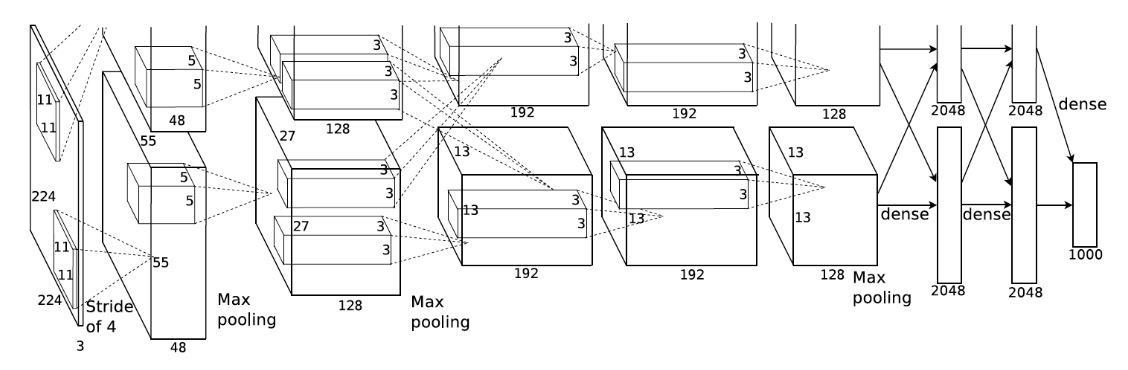

In [1]:
# install TensorFlow using Colab's tensorFlow version command

try:
    # % tensorflow_version only exisits in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

In [2]:
# import libraries 

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import cv2#reading and resizing                 
import numpy as np#arrays         
import os#dealing with directories                  
from random import shuffle #to shuffle data
from tqdm import tqdm#loop progress bar  
from sklearn.metrics import roc_auc_score    
import matplotlib.pyplot as plt # for visualizations
import tensorflow as tf # For tensor operations
import pandas as pd # for manipulating data
import zipfile
import os, sys

In [4]:
#HYPERPARAMETERS
# our photos are in the size of (80,80,3)
IMG_SIZE = 80

epochs = 5
step_size = 8
IMG_SIZE_ALEXNET = 227
validating_size = 40
nodes_fc1 = 4096
nodes_fc2 = 4096
output_classes = 4

os.chdir("C://Python_DS_Challenges")

TRAIN_DIR = os.getcwd()

#Current working directory

print(TRAIN_DIR) # current working directory

C:\Python_DS_Challenges


In [5]:
#Unzipping file
with zipfile.ZipFile("datasets.zip","r") as zip_ref:
    zip_ref.extractall()

#Reading .npy files

# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

train_data = np.load(os.path.join(os.getcwd(), 'datasets' ,'train_data_mc.npy'))
test_data = np.load(os.path.join(os.getcwd(), 'datasets' ,'test_data_mc.npy'))

In [6]:
#In order to implement ALEXNET, we are resizing them to (227,227,3)
for i in range(len(train_data)):
    train_data[i][0] = cv2.resize(train_data[i][0],(IMG_SIZE_ALEXNET,IMG_SIZE_ALEXNET))

for i in range(len(test_data)):
    test_data[i][0] = cv2.resize(test_data[i][0],(IMG_SIZE_ALEXNET,IMG_SIZE_ALEXNET))

train = train_data[:4800]
cv = train_data[4800:]

X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE_ALEXNET,IMG_SIZE_ALEXNET,3)
Y = np.array([i[1] for i in train])

cv_x = np.array([i[0] for i in cv]).reshape(-1,IMG_SIZE_ALEXNET,IMG_SIZE_ALEXNET,3)
cv_y = np.array([i[1] for i in cv])
test_x = np.array([i[0] for i in test_data]).reshape(-1,IMG_SIZE_ALEXNET,IMG_SIZE_ALEXNET,3)
test_y = np.array([i[1] for i in test_data])

In [7]:

print(X.shape)

print(Y.shape)

print(cv_x.shape)

print(test_x.shape)

steps = len(train)
print(steps)
remaining = steps % step_size

(4800, 227, 227, 3)
(4800, 4)
(400, 227, 227, 3)
(1267, 227, 227, 3)
4800


In [10]:
# make tensorFlow 2.0 backward compatibility by using tf.disable_v2_behaviour().  This allow to use TensorFlow 1.0 (tf.1)
# However by doing this we no longer able to access TensorFlow 2.0 peformance improvements specially tf.data

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

#Resetting graph

from tensorflow.python.framework import ops
ops.reset_default_graph()

#Defining Placeholders
x = tf.placeholder(tf.float32,shape=[None,IMG_SIZE_ALEXNET,IMG_SIZE_ALEXNET,3])
y_true = tf.placeholder(tf.float32,shape=[None,output_classes])

Instructions for updating:
non-resource variables are not supported in the long term


In [12]:

##CONVOLUTION LAYER 1
#Weights for layer 1
w_1 = tf.Variable(tf.truncated_normal([11,11,3,96], stddev=0.01))
#Bias for layer 1
b_1 = tf.Variable(tf.constant(0.0, shape=[[11,11,3,96][3]]))
#Applying convolution
c_1 = tf.nn.conv2d(x, w_1,strides=[1, 4, 4, 1], padding='VALID')
#Adding bias
c_1 = c_1 + b_1
#Applying RELU
c_1 = tf.nn.relu(c_1)
print(c_1)

Tensor("Relu:0", shape=(?, 55, 55, 96), dtype=float32)


In [13]:

##POOLING LAYER1
p_1 = tf.nn.max_pool(c_1, ksize=[1, 3, 3, 1],strides=[1, 2, 2, 1], padding='VALID')
print(p_1)

Tensor("MaxPool:0", shape=(?, 27, 27, 96), dtype=float32)


In [14]:

##CONVOLUTION LAYER 2
#Weights for layer 2
w_2 = tf.Variable(tf.truncated_normal([5,5,96,256], stddev=0.01))
#Bias for layer 2
b_2 = tf.Variable(tf.constant(1.0, shape=[[5,5,96,256][3]]))
#Applying convolution
c_2 = tf.nn.conv2d(p_1, w_2,strides=[1, 1, 1, 1], padding='SAME')
#Adding bias
c_2 = c_2 + b_2
#Applying RELU
c_2 = tf.nn.relu(c_2)

print(c_2)

Tensor("Relu_1:0", shape=(?, 27, 27, 256), dtype=float32)


In [15]:
##POOLING LAYER2
p_2 = tf.nn.max_pool(c_2, ksize=[1, 3, 3, 1],strides=[1, 2, 2, 1], padding='VALID')
print(p_2)

Tensor("MaxPool_1:0", shape=(?, 13, 13, 256), dtype=float32)


In [16]:
##CONVOLUTION LAYER 3
#Weights for layer 3
w_3 = tf.Variable(tf.truncated_normal([3, 3, 256, 384], stddev=0.01))
#Bias for layer 3
b_3 = tf.Variable(tf.constant(0.0, shape=[[3, 3, 256, 384][3]]))
#Applying convolution
c_3 = tf.nn.conv2d(p_2, w_3,strides=[1, 1, 1, 1], padding='SAME')
#Adding bias
c_3 = c_3 + b_3
#Applying RELU
c_3 = tf.nn.relu(c_3)

print(c_3)

Tensor("Relu_2:0", shape=(?, 13, 13, 384), dtype=float32)


In [17]:
##CONVOLUTION LAYER 4
#Weights for layer 4
w_4 = tf.Variable(tf.truncated_normal([3, 3, 384, 384], stddev=0.01))
#Bias for layer 4
b_4 = tf.Variable(tf.constant(0.0, shape=[[3, 3, 384, 384][3]]))
#Applying convolution
c_4 = tf.nn.conv2d(c_3, w_4,strides=[1, 1, 1, 1], padding='SAME')
#Adding bias
c_4 = c_4 + b_4
#Applying RELU
c_4 = tf.nn.relu(c_4)

print(c_4)

Tensor("Relu_3:0", shape=(?, 13, 13, 384), dtype=float32)


In [18]:
##CONVOLUTION LAYER 5
#Weights for layer 5
w_5 = tf.Variable(tf.truncated_normal([3, 3, 384, 256], stddev=0.01))
#Bias for layer 5
b_5 = tf.Variable(tf.constant(0.0, shape=[[3, 3, 384, 256][3]]))
#Applying convolution
c_5 = tf.nn.conv2d(c_4, w_5,strides=[1, 1, 1, 1], padding='SAME')
#Adding bias
c_5 = c_5 + b_5
#Applying RELU
c_5 = tf.nn.relu(c_5)

print(c_5)

Tensor("Relu_4:0", shape=(?, 13, 13, 256), dtype=float32)


In [19]:
##POOLING LAYER3
p_3 = tf.nn.max_pool(c_5, ksize=[1, 3, 3, 1],strides=[1, 2, 2, 1], padding='VALID')
print(p_3)

Tensor("MaxPool_2:0", shape=(?, 6, 6, 256), dtype=float32)


In [20]:

#Flattening
flattened = tf.reshape(p_3,[-1,6*6*256])
print(flattened)

Tensor("Reshape:0", shape=(?, 9216), dtype=float32)


In [21]:
##Fully Connected Layer 1
#Getting input nodes in FC layer 1
input_size = int( flattened.get_shape()[1] )
#Weights for FC Layer 1
w1_fc = tf.Variable(tf.truncated_normal([input_size, nodes_fc1], stddev=0.01))
#Bias for FC Layer 1
b1_fc = tf.Variable( tf.constant(1.0, shape=[nodes_fc1] ) )
#Summing Matrix calculations and bias
s_fc1 = tf.matmul(flattened, w1_fc) + b1_fc
#Applying RELU
s_fc1 = tf.nn.relu(s_fc1)

In [22]:
#Dropout Layer 1
hold_prob1 = tf.placeholder(tf.float32)
s_fc1 = tf.nn.dropout(s_fc1,keep_prob=hold_prob1)
print(s_fc1)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Tensor("dropout/mul_1:0", shape=(?, 4096), dtype=float32)


In [23]:
##Fully Connected Layer 2
#Weights for FC Layer 2
w2_fc = tf.Variable(tf.truncated_normal([nodes_fc1, nodes_fc2], stddev=0.01))
#Bias for FC Layer 2
b2_fc = tf.Variable( tf.constant(1.0, shape=[nodes_fc2] ) )
#Summing Matrix calculations and bias
s_fc2 = tf.matmul(s_fc1, w2_fc) + b2_fc
#Applying RELU
s_fc2 = tf.nn.relu(s_fc2)
print(s_fc2)

Tensor("Relu_6:0", shape=(?, 4096), dtype=float32)


In [24]:

#Dropout Layer 2
hold_prob2 = tf.placeholder(tf.float32)
s_fc2 = tf.nn.dropout(s_fc2,keep_prob=hold_prob1)

In [25]:

##Fully Connected Layer 3
#Weights for FC Layer 3
w3_fc = tf.Variable(tf.truncated_normal([nodes_fc2,output_classes], stddev=0.01))
#Bias for FC Layer 3b3_fc = tf.Variable( tf.constant(1.0, shape=[output_classes] ) )
b3_fc = tf.Variable( tf.constant(1.0, shape=[output_classes] ) )
#Summing Matrix calculations and bias
y_pred = tf.matmul(s_fc2, w3_fc) + b3_fc
#Applying RELU
print(y_pred)

Tensor("add_7:0", shape=(?, 4), dtype=float32)


In [26]:

#Defining loss function

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true,logits=y_pred))

#Defining objective
train = tf.train.AdamOptimizer(learning_rate=0.00001).minimize(cross_entropy)

#Defining Accuracy
matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))
acc = tf.reduce_mean(tf.cast(matches,tf.float32))

#Initializing weights
init = tf.global_variables_initializer()

In [27]:

#Starting Empty lists to keep results
acc_list = []
auc_list = []
loss_list = []
saver = tf.train.Saver()

In [28]:

#GPU settings
config = tf.ConfigProto(allow_soft_placement=True)
config.gpu_options.allow_growth = True
config.gpu_options.allocator_type = 'BFC'
with tf.Session(config=config) as sess:
    sess.run(init)
    for i in range(epochs):
        for j in range(0,steps-remaining,step_size):
            #Feeding step_size-amount data with 0.5 keeping probabilities on DROPOUT LAYERS
            _,c = sess.run([train,cross_entropy],
			feed_dict={x:X[j:j+step_size] , y_true:Y[j:j+step_size],hold_prob1:0.5,hold_prob2:0.5})
        
        
		#Writing for loop to calculate test statistics. GTX 1050 isn't able to calculate all test data.
        cv_auc_list = []
        cv_acc_list = []
        cv_loss_list = []
        for v in range(0,len(cv_x)-int(len(cv_x) % validating_size),validating_size):
            acc_on_cv,loss_on_cv,preds = sess.run([acc,cross_entropy,tf.nn.softmax(y_pred)],
			feed_dict={x:cv_x[v:v+validating_size] ,y_true:cv_y[v:v+validating_size] ,hold_prob1:1.0,hold_prob2:1.0})
			
            auc_on_cv = roc_auc_score(cv_y[v:v+validating_size],preds)
            cv_acc_list.append(acc_on_cv)
            cv_auc_list.append(auc_on_cv)
            cv_loss_list.append(loss_on_cv)
        acc_cv_ = round(np.mean(cv_acc_list),5)
        auc_cv_ = round(np.mean(cv_auc_list),5)
        loss_cv_ = round(np.mean(cv_loss_list),5)
        acc_list.append(acc_cv_)
        auc_list.append(auc_cv_)
        loss_list.append(loss_cv_)
        print("Epoch:",i,"Accuracy:",acc_cv_,"Loss:",loss_cv_ ,"AUC:",auc_cv_)
    
    test_auc_list = []
    test_acc_list = []
    test_loss_list = []
    for v in range(0,len(test_x)-int(len(test_x) % validating_size),validating_size):
        acc_on_test,loss_on_test,preds = sess.run([acc,cross_entropy,tf.nn.softmax(y_pred)],
		feed_dict={x:test_x[v:v+validating_size] ,y_true:test_y[v:v+validating_size] ,hold_prob1:1.0,hold_prob2:1.0})
        
        auc_on_test = roc_auc_score(test_y[v:v+validating_size],preds)
        test_acc_list.append(acc_on_test)
        test_auc_list.append(auc_on_test)
        test_loss_list.append(loss_on_test)
    saver.save(sess, os.path.join(os.getcwd(),"CNN_MC.ckpt"))
    test_acc_ = round(np.mean(test_acc_list),5)
    test_auc_ = round(np.mean(test_auc_list),5)
    test_loss_ = round(np.mean(test_loss_list),5)
    print("Test Results are below:")
    print("Accuracy:",test_acc_,"Loss:",test_loss_,"AUC:",test_auc_)

Epoch: 0 Accuracy: 0.715 Loss: 0.70956 AUC: 0.91527
Epoch: 1 Accuracy: 0.7725 Loss: 0.58323 AUC: 0.94693
Epoch: 2 Accuracy: 0.8225 Loss: 0.48327 AUC: 0.96407
Epoch: 3 Accuracy: 0.845 Loss: 0.448 AUC: 0.96873
Epoch: 4 Accuracy: 0.86 Loss: 0.41803 AUC: 0.97537
Test Results are below:
Accuracy: 0.84919 Loss: 0.43021 AUC: 0.97491


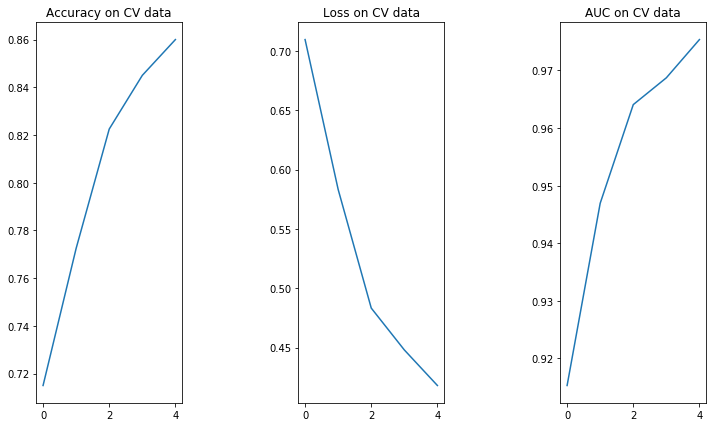

In [29]:
f,ax=plt.subplots(1,3,figsize=(12,3))
pd.Series(acc_list).plot(kind='line',title='Accuracy on CV data',ax=ax[0])
pd.Series(loss_list).plot(kind='line',figsize=(12,7),title='Loss on CV data',ax=ax[1])
pd.Series(auc_list).plot(kind='line',figsize=(12,7),title='AUC on CV data',ax=ax[2])
plt.subplots_adjust(wspace=0.8)
ax[0].set_title('Accuracy on CV data')
ax[1].set_title('Loss on CV data')
ax[2].set_title('AUC on CV data')
plt.show()

In [30]:
#Restoring a pretrained
with tf.Session() as session:
    saver.restore(session, "CNN_MC.ckpt")
    print("Model restored.") 
    print('Initialized')
    k = session.run([tf.nn.softmax(y_pred)], feed_dict={x:test_x[0:64] , hold_prob1:1,hold_prob2:1})

print(np.array(k).shape)

INFO:tensorflow:Restoring parameters from CNN_MC.ckpt
Model restored.
Initialized
(1, 64, 4)


In [31]:
#Reshaping k
k = np.array(k).reshape(64,output_classes)

print(k[0])

pred_labels = []

for i in range(64):
    r = np.round(k[i],3).argmax()
    if r ==0 : pred_labels.append("chair")
    elif r ==1: pred_labels.append("kitchen")
    elif r ==2: pred_labels.append("knife")
    elif r ==3: pred_labels.append("saucepan")

[0.00312527 0.90435755 0.08325408 0.00926317]


In [32]:
#Multiple images parameters
w=80
h=80
columns = 8
rows = 8

(64, 227, 227, 3)


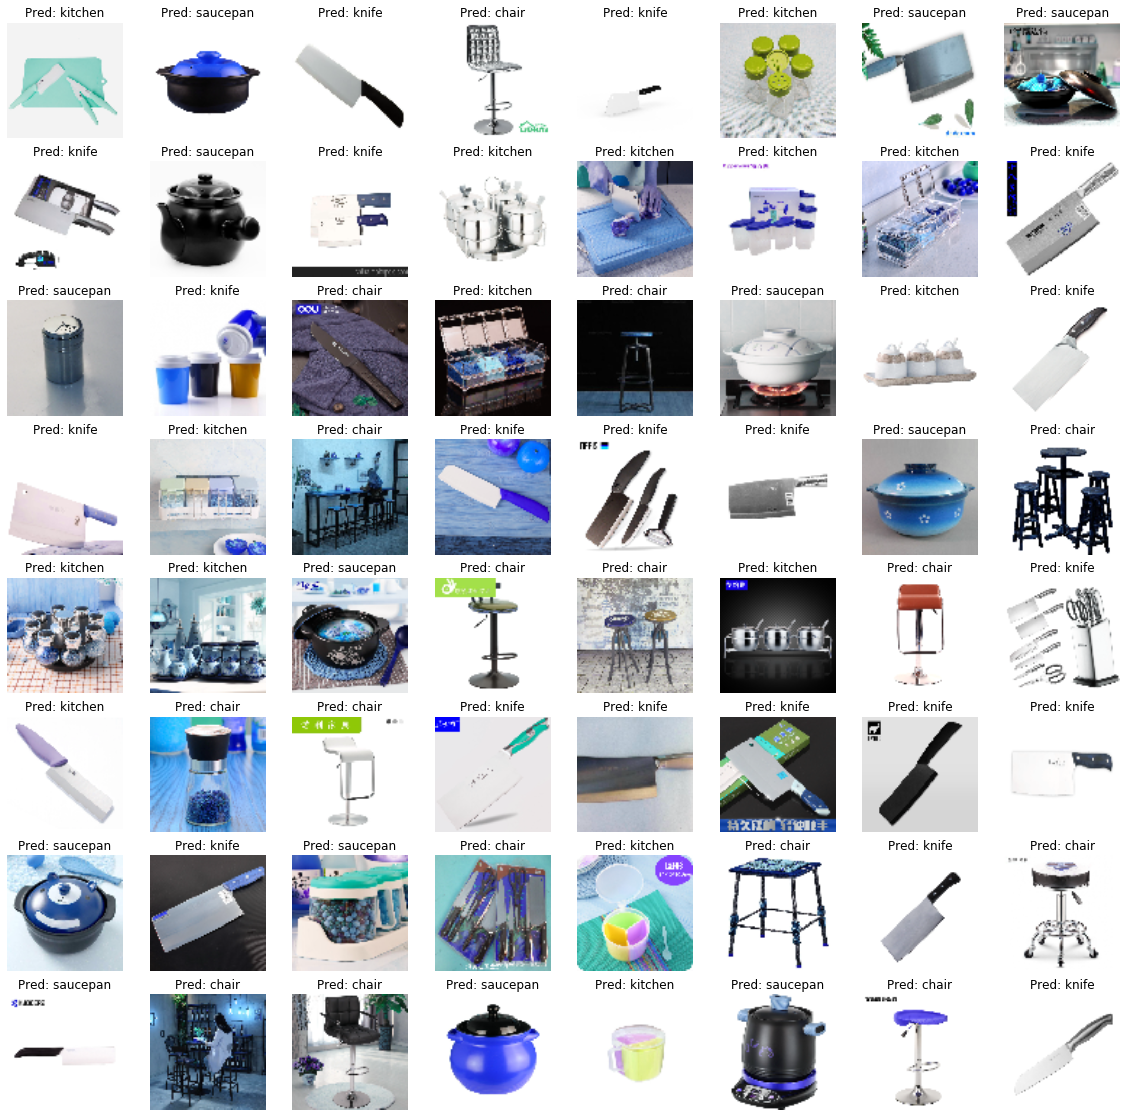

In [33]:
#First 64 images
images = test_x[:64]

print(images.shape)

fig = plt.figure(figsize=(20, 20))
for m in range(1, columns*rows +1):
    img = images[m-1].reshape([IMG_SIZE_ALEXNET, IMG_SIZE_ALEXNET, 3])
    fig.add_subplot(rows, columns, m)
    plt.imshow(img)
    plt.title("Pred: " + pred_labels[m-1])
    plt.axis('off')
plt.show()

# RESULTS:
    
    Able to achieve the accuracy score of 86% after 4 iterations.
    Predictions for intial 64 test images are shown above